In [1]:
#Importação Bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
import matplotlib.pyplot  as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [8]:
#Carregamento dos Dados
data = pd.DataFrame(
    {'Potência (kW)': [120, 80, 100, 110, 90, 130, 70, 105, 115, 85],
        'Eficiência (%)': [92, 65, 75, 85, 68, 95, 60, 80, 88, 70],
        'Idade (anos)': [3, 8, 5, 4, 7, 2, 10, 6, 3, 9],
        'Tamanho (m²)': [50, 45, 55, 60, 48, 62, 40, 58, 56, 47],
        'Consumo de Energia': ['Eficiente', 'Ineficiente', 'Ineficiente', 'Eficiente', 'Ineficiente', 'Eficiente', 'Ineficiente', 'Eficiente', 'Eficiente', 'Ineficiente']})

In [12]:
X = data[['Potência (kW)', 'Eficiência (%)', 'Idade (anos)', 'Tamanho (m²)']]
y = data['Consumo de Energia']

In [13]:
#Dividindo a base de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42)

In [14]:
modelo = SVC(kernel= 'linear') # crio o modelo SVC
modelo.fit(X_train,y_train) # treino o modelo

SVC(kernel='linear')

In [15]:
y_pred = modelo.predict(X_test)

In [16]:
X_test

,Potência (kW),Eficiência (%),Idade (anos),Tamanho (m²)
8,115,88,3,56
1,80,65,8,45
5,130,95,2,62


In [18]:
data.head(11)

,Potência (kW),Eficiência (%),Idade (anos),Tamanho (m²),Consumo de Energia
0,120,92,3,50,Eficiente
1,80,65,8,45,Ineficiente
2,100,75,5,55,Ineficiente
3,110,85,4,60,Eficiente
4,90,68,7,48,Ineficiente
5,130,95,2,62,Eficiente
6,70,60,10,40,Ineficiente
7,105,80,6,58,Eficiente
8,115,88,3,56,Eficiente
9,85,70,9,47,Ineficiente


In [19]:
#Calculo das métricas do algoritmo de Machine Learning
#Classification Report
acc = accuracy_score(y_pred,y_test)
acuracy = accuracy_score(y_pred,y_test)
print(acuracy)

1.0


In [20]:
#Matriz de Confusão
cm = confusion_matrix(y_pred,y_test)
print(cm)

[[2 0]
 [0 1]]


Text(50.72222222222221, 0.5, 'Eficiente')

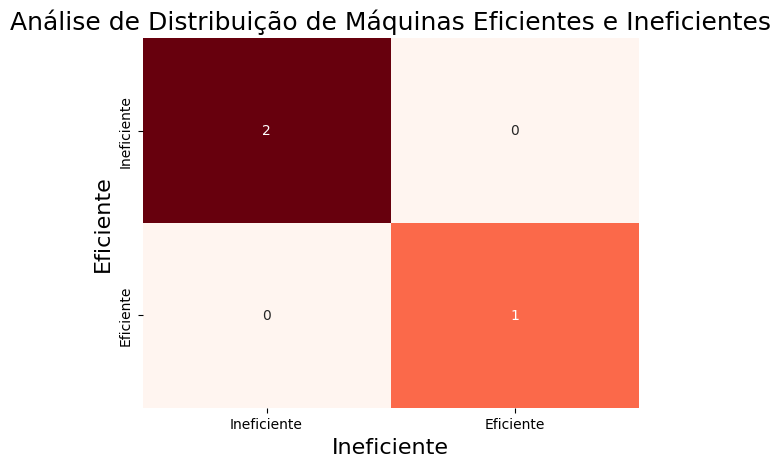

In [22]:
#Vizualizando a matriz de confusão de forma gráfica
sns.heatmap(cm,annot=True, fmt='d', cmap='Reds', cbar=False, 
            xticklabels=['Ineficiente', 'Eficiente'], 
            yticklabels=['Ineficiente','Eficiente'])    
                         
plt.title('Análise de Distribuição de Máquinas Eficientes e Ineficientes',fontsize=18)     
plt.xlabel('Ineficiente', fontsize=16)
plt.ylabel('Eficiente',fontsize=16)  

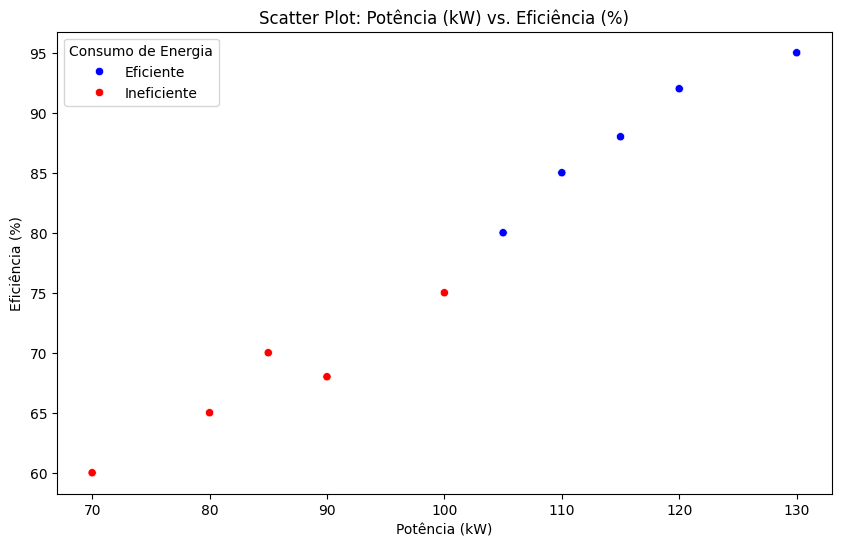

In [23]:
#Mapeando as cores com base na classe
palette = {"Ineficiente": "red", "Eficiente": "blue"}
# Criando o scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Potência (kW)', y='Eficiência (%)', hue='Consumo de Energia', data=data, palette= palette)

# Personalizando o gráfico
plt.title('Scatter Plot: Potência (kW) vs. Eficiência (%)')
plt.xlabel('Potência (kW)')
plt.ylabel('Eficiência (%)')

# Mostrando o gráfico
plt.legend(title='Consumo de Energia')
plt.show()